Loading training data...
Creating combined topic dataset...
Loading book data from: ../data/topic/Books_rating.csv
Read 1197 book reviews
Loaded 1197 valid book reviews
Loading movie data from: ../data/topic/IMDB_Dataset.csv
Read 1197 movie reviews
Loaded 1197 valid movie reviews

Selected sport categories: ['rec.sport.baseball', 'rec.sport.hockey']

Fetched 1197 sports articles
Combined dataset created with 3591 entries
Saving combined dataset to ../data/topic/combined_topics.csv
Dataset saved successfully
Train data shape: (3231, 2)
Dev data shape: (360, 2)

Training Naive Bayes classifier...
Initialized bayes classifier
Transforming training text to TF-IDF features...
Training Naive Bayes model...
Model trained successfully with 5000 features.

Test data shape: (18, 4)
   sentence_id                                           sentence sentiment  \
0            0  The stadium was alive with the roar of the cro...  positive   
1            1  That last-minute goal had me jumping out of

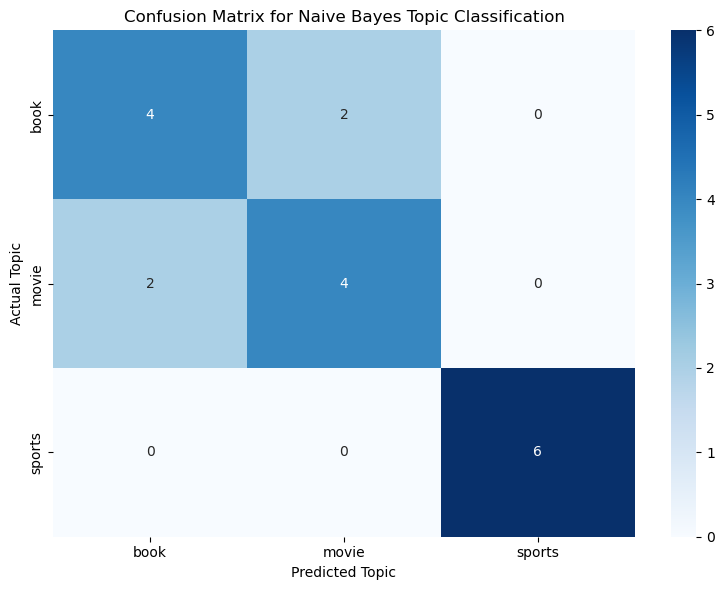


Misclassified examples: 4/18 (22.2%)

Sample of misclassified examples:
                                                 text true_topic  \
4   I enjoyed the way the timelines shifted, even ...       book   
6   The movie was a wild ride from start to finish...      movie   
16  It’s surprising how a promising start could un...      movie   
3   The story had its moments, though some parts f...       book   

   predicted_topic  
4            movie  
6             book  
16            book  
3            movie  

Predicting topics for new sentences:

Text: The game was exciting with a dramatic finish in the final quarter.
Predicted topic: sports

Text: This novel has beautiful character development and an engaging plot.
Predicted topic: book

Text: The cinematography in this film was stunning and the acting superb.
Predicted topic: movie


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

from topic_classification.topic_classification_models import TopicClassifier
from topic_classification.training_data import TrainingDataConstructor

# Set paths to data files
BOOKS_PATH = '../data/topic/Books_rating.csv'
MOVIES_PATH = '../data/topic/IMDB_Dataset.csv'
SPORTS_PATH = '../data/topic/sports_and_outdoors.jsonl'
TEST_PATH = '../data/sentiment-topic-test.tsv'

print("Loading training data...")
constructor = TrainingDataConstructor(
    books_topic_path=BOOKS_PATH,
    movies_topic_path=MOVIES_PATH
)

combined_data = constructor.create_combined_dataset(
    nrows=1197,  # Same number for each source
    output_path="../data/topic/combined_topics.csv"  # Save the combined dataset
)

from sklearn.model_selection import train_test_split
train_data, dev_data = train_test_split(
    combined_data, 
    test_size=0.1, 
    random_state=0,
    stratify=combined_data[['topic']]
)

print(f"Train data shape: {train_data.shape}")
print(f"Dev data shape: {dev_data.shape}")

print("\nTraining Naive Bayes classifier...")
classifier = TopicClassifier(model_name='bayes', max_features=5000)
classifier.train(train_data)

test_data = pd.read_csv(TEST_PATH, sep='\t')
print(f"\nTest data shape: {test_data.shape}")
print(test_data.head(3))

print("\nEvaluating model on test data...")
metrics = classifier.evaluate(
    test_data, 
    text_column='sentence',
    label_column='topic',
    display_matrix=True,
    display_misclassified=True
)

print("\nPredicting topics for new sentences:")
new_texts = [
    "The game was exciting with a dramatic finish in the final quarter.",
    "This novel has beautiful character development and an engaging plot.",
    "The cinematography in this film was stunning and the acting superb."
]

predictions = classifier.predict(new_texts)
for text, prediction in zip(new_texts, predictions):
    print(f"\nText: {text}")
    print(f"Predicted topic: {prediction}")

Initialized xgboost classifier
Transforming training text to TF-IDF features...
Encoding labels...
Classes found: ['book' 'movie' 'sports']
Training XGBoost model with 5000 features...


c:\Users\augus\university\Text_Mining\final_project\vrije-project-TM\.pixi\envs\default\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:35:39] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.
Accuracy: 0.6111

Classification Report:
              precision    recall  f1-score   support

        book       1.00      0.33      0.50         6
       movie       1.00      0.50      0.67         6
      sports       0.46      1.00      0.63         6

    accuracy                           0.61        18
   macro avg       0.82      0.61      0.60        18
weighted avg       0.82      0.61      0.60        18



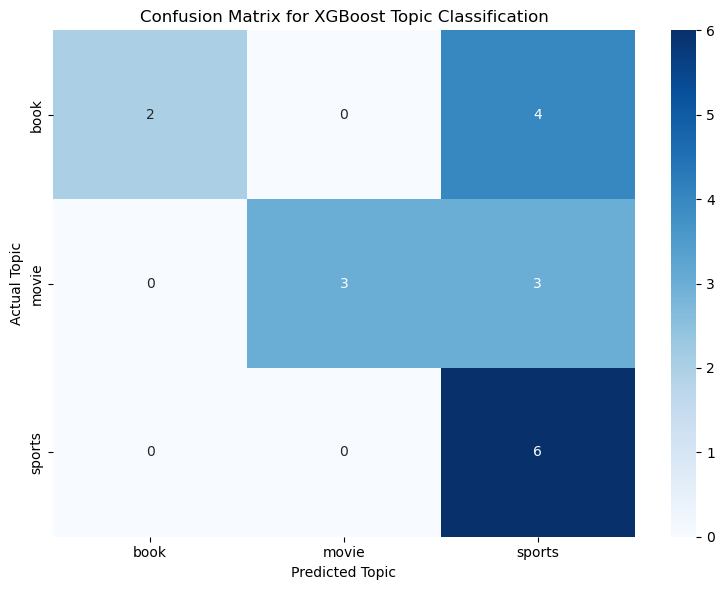


Misclassified examples: 7/18 (38.9%)

Sample of misclassified examples:
                                                 text true_topic  \
16  It’s surprising how a promising start could un...      movie   
15  Word is, the screenplay was scribbled down dur...      movie   
10  I found the main character so annoying that it...       book   
9   The trailer was decent, giving you a taste wit...      movie   
11  The author's style feels really genuine, makin...       book   

   predicted_topic  
16          sports  
15          sports  
10          sports  
9           sports  
11          sports  


In [6]:
# Create and train an XGBoost classifier
classifier = TopicClassifier(model_name='xgboost', max_features=5000, n_estimators=100)
classifier.train(train_data)

# Evaluate it
metrics = classifier.evaluate(test_data)

Using device: cpu
Initialized pytorch classifier
Transforming training text to TF-IDF features...
Encoding labels...
Classes found: ['book' 'movie' 'sports']
Model created with input dimension: 5000, output classes: 3
Beginning training for 20 epochs...
Epoch [1/20], Loss: 0.9611
Epoch [5/20], Loss: 0.0081
Epoch [10/20], Loss: 0.0016
Epoch [15/20], Loss: 0.0005
Epoch [20/20], Loss: 0.0003
Training complete!
Accuracy: 0.6667

Classification Report:
              precision    recall  f1-score   support

        book       1.00      0.67      0.80         6
       movie       0.67      0.33      0.44         6
      sports       0.55      1.00      0.71         6

    accuracy                           0.67        18
   macro avg       0.74      0.67      0.65        18
weighted avg       0.74      0.67      0.65        18



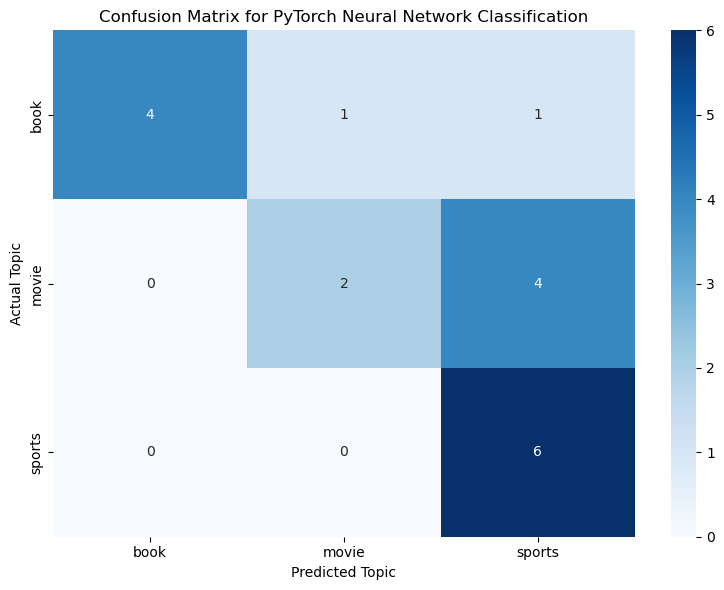


Misclassified examples: 6/18 (33.3%)

Sample of misclassified examples:
                                                 text true_topic  \
16  It’s surprising how a promising start could un...      movie   
4   I enjoyed the way the timelines shifted, even ...       book   
3   The story had its moments, though some parts f...       book   
9   The trailer was decent, giving you a taste wit...      movie   
15  Word is, the screenplay was scribbled down dur...      movie   

   predicted_topic  
16          sports  
4           sports  
3            movie  
9           sports  
15          sports  


In [7]:
# Create and train a PyTorch neural network classifier
classifier = TopicClassifier(
    model_name='pytorch', 
    max_features=5000,
    hidden_dim=128,
    dropout=0.3,
    lr=0.001,
    batch_size=64,
    epochs=20
)

classifier.train(train_data)

metrics = classifier.evaluate(test_data)
